In [329]:
#Import dependancies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import os
import csv
import scipy.stats as stats
from scipy.stats import linregress

In [330]:
#Get file and create a data frame
file = Path("athlete_events.csv")
original_df = pd.read_csv(file)
#display data frame
original_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [331]:
#filter down dataframe with columns relevant to what we are looking for
age_df = original_df[["Sex","Age","Sport","Medal"]]
age_df.head()

,Sex,Age,Sport,Medal
0,M,24.0,Basketball,NaN
1,M,23.0,Judo,NaN
2,M,24.0,Football,NaN
3,M,34.0,Tug-Of-War,Gold
4,F,21.0,Speed Skating,NaN


In [332]:
#filter dataframe to delete anything without all columns filled
age_df = age_df.dropna(subset=['Sex','Age','Sport'])
age_df.head()

,Sex,Age,Sport,Medal
0,M,24.0,Basketball,NaN
1,M,23.0,Judo,NaN
2,M,24.0,Football,NaN
3,M,34.0,Tug-Of-War,Gold
4,F,21.0,Speed Skating,NaN


In [464]:
#Sort the dataframe to only include one sport and one sex and count how many athletes there are in each age group
gym_df = age_df[age_df["Sport"]=="Gymnastics"]
female_gym = gym_df[gym_df["Sex"]=="F"]
female_gym = female_gym.groupby('Age').size().reset_index(name='Female_count')
#Create another dataframe which only include decorated olympians
gym_medal = gym_df.dropna(subset="Medal")
female_medal = gym_medal[gym_medal["Sex"]=="F"]
female_gym_medal = female_medal.groupby('Age').size().reset_index(name='Female_count')


,Sex,Age,Sport,Medal
41,M,28.0,Gymnastics,Bronze
42,M,28.0,Gymnastics,Gold
43,M,28.0,Gymnastics,NaN
44,M,28.0,Gymnastics,Gold
45,M,28.0,Gymnastics,NaN
...,...,...,...,...
270911,F,25.0,Gymnastics,NaN
270914,M,30.0,Gymnastics,Silver
270915,M,30.0,Gymnastics,Silver
270916,M,30.0,Gymnastics,NaN


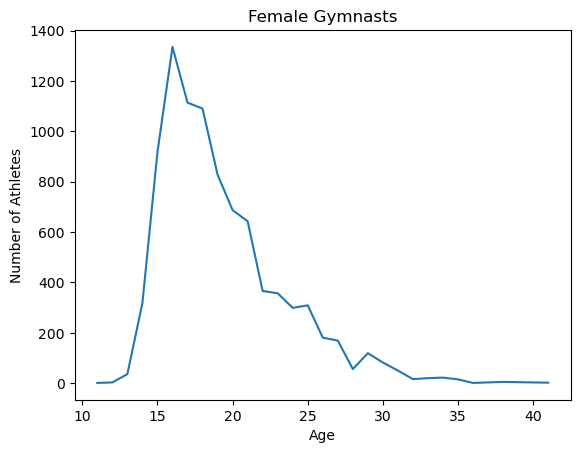

In [443]:
#Create a graph of age vs number of athletes
fig_1 = plt.plot(female_gym["Age"],female_gym["Female_count"])
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.title("Female Gymnasts");

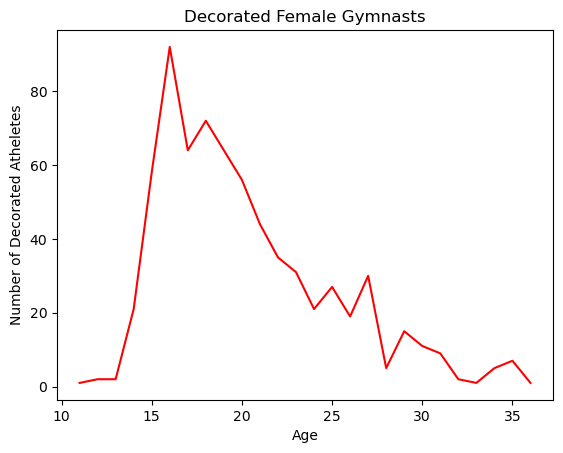

In [445]:
#Create a graph of age vs number of decorated athletes
fig_2 = plt.plot(female_gym_medal["Age"],female_gym_medal["Female_count"],color = "red")
plt.xlabel("Age")
plt.ylabel("Number of Decorated Atheletes")
plt.title("Decorated Female Gymnasts");

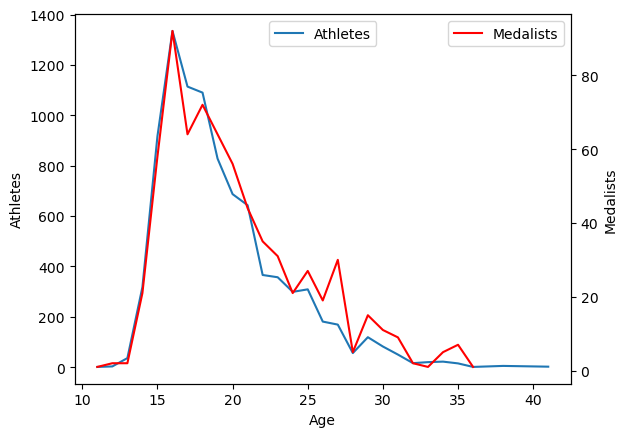

In [336]:
#Overlay the graphs
fig,ax1=plt.subplots()
ax1.set_xlabel("Age")
ax1.set_ylabel("Athletes")
ax1.plot(female_gym["Age"],female_gym["Female_count"],label="Athletes")
ax1.tick_params(axis="y")
ax1.set_label("Athletes")
plt.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.set_ylabel('Medalists')
ax2.plot(female_gym_medal["Age"],female_gym_medal["Female_count"],color = "red",label="Medalists")
ax2.set_label("Medalists")
plt.legend(loc="upper right")

plt.show()

In [337]:
#Get stats for athlete dataframe
female_gym.describe()

,Age,Female_count
count,29.000000,29.000000
mean,25.068966,311.862069
std,8.639325,398.241467
min,11.000000,1.000000
25%,18.000000,16.000000
50%,25.000000,119.000000
75%,32.000000,366.000000
max,41.000000,1335.000000


In [338]:
#Get stats for decorated athlete dataframe
female_gym_medal.describe()

,Age,Female_count
count,26.000000,26.000000
mean,23.500000,26.730769
std,7.648529,26.303700
min,11.000000,1.000000
25%,17.250000,5.000000
50%,23.500000,20.000000
75%,29.750000,41.750000
max,36.000000,92.000000


In [339]:
age_df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Military Ski Patrol', 'Croquet',
       'Jeu De Paume', 'Roque', 'Alpinism', 'Motorb

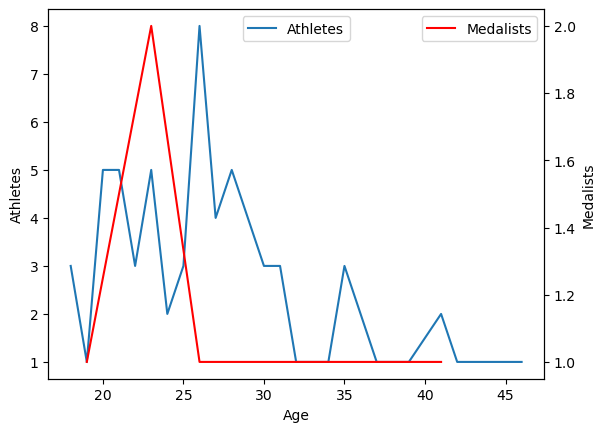

In [340]:
#Create a graph showing how the distribution will look differently with different sports
sport = "Golf"
sport_df = age_df[age_df["Sport"]==sport]
female_sport = sport_df[sport_df["Sex"]=="F"]
female_sport = female_sport.groupby('Age').size().reset_index(name='Female_count')
sport_medal = sport_df.dropna(subset="Medal")
female_medal = sport_medal[sport_medal["Sex"]=="F"]
female_sport_medal = female_medal.groupby('Age').size().reset_index(name='Female_count')
pd.DataFrame(female_sport_medal)
#Overlay the graphs
fig,ax1=plt.subplots()
ax1.set_xlabel("Age")
ax1.set_ylabel("Athletes")
ax1.plot(female_sport["Age"],female_sport["Female_count"],label="Athletes")
ax1.tick_params(axis="y")
ax1.set_label("Athletes")
plt.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.set_ylabel('Medalists')
ax2.plot(female_sport_medal["Age"],female_sport_medal["Female_count"],color = "red",label="Medalists")
ax2.set_label("Medalists")
plt.legend(loc="upper right")

plt.show()


In [441]:
female_gym_medal["Age"].unique()

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

In [447]:
female_gym["Age"].unique()

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 41.])

In [473]:
#create a list of ages that have won a medal
age = [11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
        24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.]
athlete_count = []
medal_count = []
no_medals = []
proportions = []

for x in age:
    for y in female_gym["Age"]:
        for z in female_gym_medal["Age"]:
            if x == y:
                if x == z:
                    athletes = female_gym.loc[female_gym["Age"]==x,"Female_count"].iloc[0]
                    medals = female_gym_medal.loc[female_gym_medal["Age"]==x,"Female_count"].iloc[0]
                    athlete_count.append(female_gym.loc[female_gym["Age"]==x,"Female_count"].iloc[0])
                    medal_count.append(female_gym_medal.loc[female_gym_medal["Age"]==x,"Female_count"].iloc[0])
                    equation = medals/athletes
                    proportions.append(equation)
                else:
                    no_medals.append(x)
    athlete_count = []
    medal_count = []    


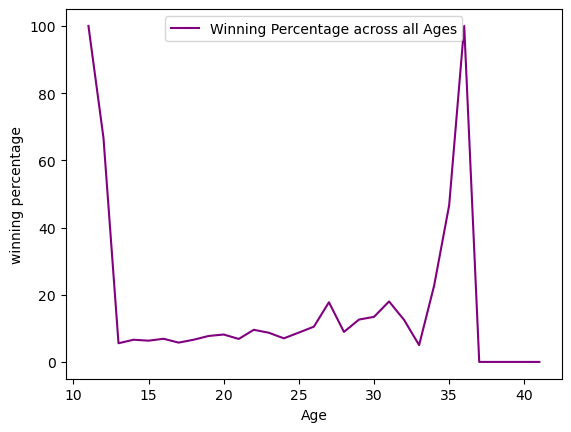

In [491]:
a = 0
proportions.append(a)
proportions.append(a)
proportions.append(a)
new_proportions = [i*100 for i in proportions]
fig,ax3=plt.subplots()
ax3.set_xlabel("Age")
ax3.set_ylabel("winning percentage")
ax3.plot(female_gym["Age"],new_proportions,label="Winning Percentage across all Ages", color = "purple")
ax3.tick_params(axis="y")
ax3.set_label("Winning Percentage across ages")
plt.legend(loc='upper center');

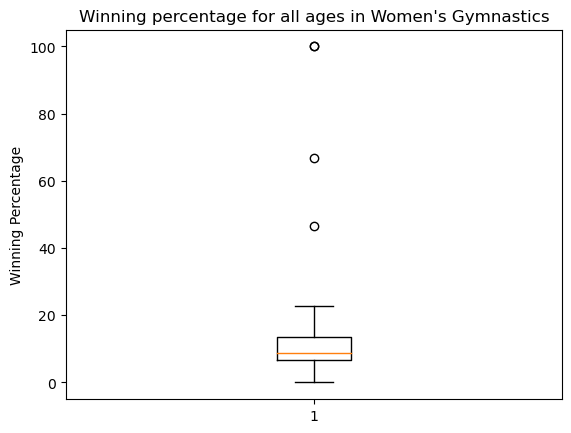

In [495]:
fig4,ax4 = plt.subplots()
new_proportions = [i*100 for i in proportions]
ax4.boxplot(new_proportions)
ax4.set_ylabel("Winning Percentage")
ax4.set_title("Winning percentage for all ages in Women's Gymnastics")
plt.show()